In [2]:
import mglearn
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [6]:
cancer = pd.read_csv('../Resources/breast_cancer.csv')

X_train, X_test, y_train, y_test = train_test_split(cancer.loc[:,"mean radius":"worst fractal dimension"],cancer['target'], stratify=cancer['target'], random_state=42)

tree_model = DecisionTreeClassifier(random_state=0)
tree_model.fit(X_train, y_train)

print('Accuracy on the training subset: {:.3f}'.format(tree_model.score(X_train, y_train)))
print('Accuracy on the testing subset: {:.3f}'.format(tree_model.score(X_test, y_test)))

Accuracy on the training subset: 1.000
Accuracy on the testing subset: 0.937


In [7]:
cancer_feature = list(cancer.columns)
del cancer_feature[0]

In [8]:
cancer_feature

['mean radius',
 'mean texture',
 'mean perimeter',
 'mean area',
 'mean smoothness',
 'mean compactness',
 'mean concavity',
 'mean concave points',
 'mean symmetry',
 'mean fractal dimension',
 'radius error',
 'texture error',
 'perimeter error',
 'area error',
 'smoothness error',
 'compactness error',
 'concavity error',
 'concave points error',
 'symmetry error',
 'fractal dimension error',
 'worst radius',
 'worst texture',
 'worst perimeter',
 'worst area',
 'worst smoothness',
 'worst compactness',
 'worst concavity',
 'worst concave points',
 'worst symmetry',
 'worst fractal dimension']

In [9]:
### we have some overfitting here, i need to contraol the development of tree
tree_model

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [10]:
tree_model = DecisionTreeClassifier(max_depth=3, random_state=0)
tree_model.fit(X_train, y_train)
print('Accuracy on the training subset: {:.3f}'.format(tree_model.score(X_train, y_train)))
print('Accuracy on the testing subset: {:.3f}'.format(tree_model.score(X_test, y_test)))

Accuracy on the training subset: 0.977
Accuracy on the testing subset: 0.944


In [11]:
tree_model = DecisionTreeClassifier(max_depth=4, random_state=0)
tree_model.fit(X_train, y_train)
print('Accuracy on the training subset: {:.3f}'.format(tree_model.score(X_train, y_train)))
print('Accuracy on the testing subset: {:.3f}'.format(tree_model.score(X_test, y_test)))

Accuracy on the training subset: 0.988
Accuracy on the testing subset: 0.951


In [12]:
import graphviz
from sklearn import tree
from sklearn.tree import export_graphviz

data = tree.export_graphviz(tree_model, out_file=None, class_names=['malignant', 'benign'], feature_names=cancer_feature,
               impurity=False, filled=True,rounded=True,special_characters=True)
import pydotplus
graph = pydotplus.graph_from_dot_data(data)
graph.write_png('cancerTree.png')

graph = graphviz.Source(data)  
graph 

InvocationException: GraphViz's executables not found

#### return the weights of each features

In [13]:
print("feature Importances: {}". format(tree_model.feature_importances_))
# those arrays return the each weights for each feature but not sure which value accrod to which features


feature Importances: [ 0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.01019737  0.04839825  0.          0.
  0.0024156   0.          0.          0.          0.          0.
  0.72682851  0.0458159   0.          0.          0.0141577   0.          0.018188
  0.1221132   0.01188548  0.        ]


Viz the weight of each feature

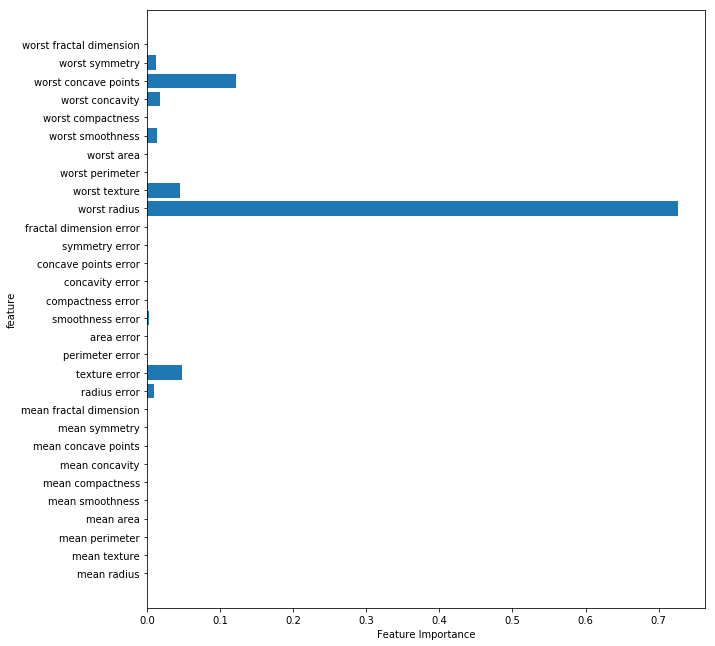

In [14]:
import numpy as np

plt.figure(figsize = (10,11))
plt.barh(range(len(cancer_feature)), tree_model.feature_importances_)
plt.yticks(np.arange(len(cancer_feature)), cancer_feature)
plt.xlabel('Feature Importance')
plt.ylabel("feature")
plt.show()

# here are the weight for each features

worst symmetry, Worst concave points, worst concavity, worst smoothness, 
worst texture, worst radius, texture error, radius error are th feature that weights in the model

## Random Forest

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

cancer = pd.read_csv('../Resources/breast_cancer.csv')

X_train, X_test, y_train, y_test = train_test_split(cancer.loc[:,"mean radius":"worst fractal dimension"],cancer['target'], stratify=cancer['target'], random_state=42)

forest_model = RandomForestClassifier(random_state=0)
forest_model.fit(X_train, y_train)



print('Accuracy on the training subset: {:.3f}'.format(forest_model.score(X_train, y_train)))
print('Accuracy on the test subset: {:.3f}'.format(forest_model.score(X_test, y_test)))

Accuracy on the training subset: 1.000
Accuracy on the test subset: 0.951


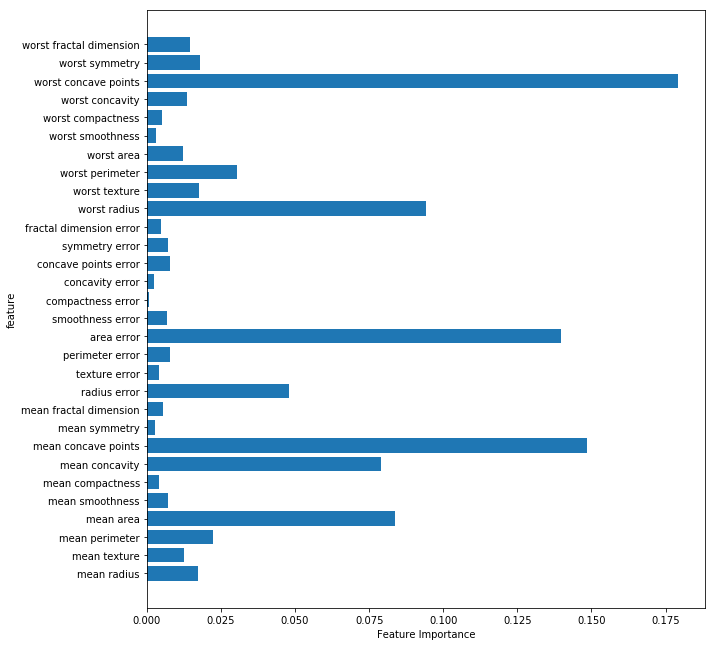

In [14]:

plt.figure(figsize = (10,11))
plt.barh(range(len(cancer_feature)), forest_model.feature_importances_)
plt.yticks(np.arange(len(cancer_feature)), cancer_feature)
plt.xlabel('Feature Importance')
plt.ylabel("feature")
plt.show()

### Now we can see forest provide us with more information with weights for features so forest tend to be better model than tree 